In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\Pu\Documents\GitHub\GEO572-Project-E.St.Louis\pumping\Pumpage_Data_ESL.xlsx')

In [3]:
# replace all 0-value as NaN
df_pump = df.iloc[:,7:]
df_pump = df_pump/10**6/365.25
# df_pump = df_pump.replace(0,np.nan)
df.iloc[:,7:] = df_pump

In [4]:
df_fac_pump = df.iloc[:,2:]
df_fac_pump = df_fac_pump.drop(['fac_well_num','depth_total_last_known','lam_x','lam_y'],axis=1)
df_fac_pump = df_fac_pump.groupby(['owner'], as_index=False).sum()
# df_fac_pump = df_fac_pump.replace(0,np.nan)
print(df_fac_pump)

                              owner       1981       1982       1983  \
0                          ALHAMBRA   0.053388   0.054757   0.060233   
1                    ALTON STEEL CO   2.446324   2.212183   2.209446   
2                   AMERICAN CAN CO   0.008214   0.000000   0.000000   
3    AMERICAN COLLOID PROCESSING SA   0.000657   0.000055   0.000427   
4         ARCHER-DANIELS-MIDLAND CO   0.000000   0.000000   0.000000   
..                              ...        ...        ...        ...   
99             VIRGIL GUMMERSHEIMER   0.000000   0.000000   0.000000   
100                WITTENAUER FARMS   0.000000   0.000000   0.000000   
101                      WOOD RIVER   1.311214   1.261829   1.275272   
102             WOOD RIVER REFINERY  11.983573  13.108830  11.832991   
103                          WORDEN   0.056961   0.046804   0.055488   

          1984       1985       1986       1987       1988       1989  ...  \
0     0.064339   0.064641   0.065708   0.062971   0.06844

Text(0.5, 0, 'year')

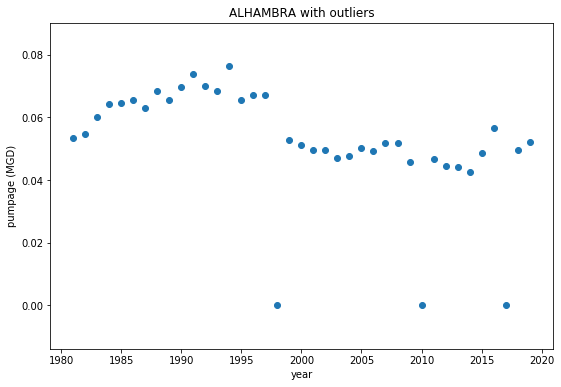

In [5]:
year_list = range(1981,2020)
pump1 = df_fac_pump.iloc[0,1:]

plt.figure(figsize=(9,6))
plt.title('ALHAMBRA with outliers')
plt.scatter(year_list,pump1)
plt.ylabel('pumpage (MGD)')
plt.xlabel('year')
# df_fac_pump.iloc[0,1:].plot()
# plt.show()

In [6]:
print(pump1.mean())

0.05257559451727829


In [7]:
for i in range(103):
    a = df_fac_pump.iloc[i,1:].mean()
    for j in range(1,39):
        if 10*df_fac_pump.iloc[i,j]<a or df_fac_pump.iloc[i,j]>10*a:
            df_fac_pump.iloc[i,j] = np.nan
            
df_fac_pump.iloc[:,1:] = df_fac_pump.iloc[:,1:].interpolate(method='linear', limit_direction='forward', axis=1)           

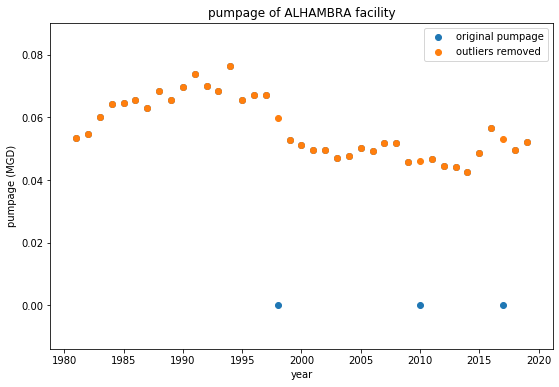

In [8]:
pump2 = df_fac_pump.iloc[0,1:]
plt.figure(figsize=(9,6))
plt.scatter(year_list,pump1,label='original pumpage')
plt.scatter(year_list,pump2,label='outliers removed')
plt.title('pumpage of ALHAMBRA facility')
plt.ylabel('pumpage (MGD)')
plt.xlabel('year')
plt.legend()
# print(pump2)